<div align=center>

<p></p>
<p></p>
<font size=5>
<font/>
<p></p>
 <br/>
    <br/>
<font color=#FF7500>
Sharif University of Technology - Department of Computer Engineering
</font>
<p></p>
<font color=blue>
Machine Learning - Dr. Fatemeh Seyyedsalehi
</font>
<br/>
<br/>
Winter 2024

<div/>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Assignment 1 - Q1
			</font>
    <br/>
<font size=4>
			<br/><br/>
Deadline:  March the 16th


<br/>
<br/>
<b>

Kian Izadpanah 400104783
<b/>
                <br/><br/><br/>
                <font color=red>
     </font>
</font>
                <br/>
    </div>



In this notebook, we are looking for the diagnosis of heart disease among patients using the [heart disease dataset](https://www.kaggle.com/johnsmith88/heart-disease-dataset). First, read the information about the different features, then answer the questions in each section using the attached data.

# Data

## Importing Libraries

In this notebook, you cannot use scikit learn and other libraries, except for those imported below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

Load dataset csv file into a data frame.

In [2]:
# TODO
df = pd.read_csv("/kaggle/input/heart-dataset/heart.csv")

## EDA

In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. In this section, you should analyze the data. You can use the functions provided by the Pandas library. You can use analysis such as null checking of features, number of features and samples, and type of features. But don't stop there and search for it.


columns are:

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None
counts of missing values in each column are:

age         0
sex    

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

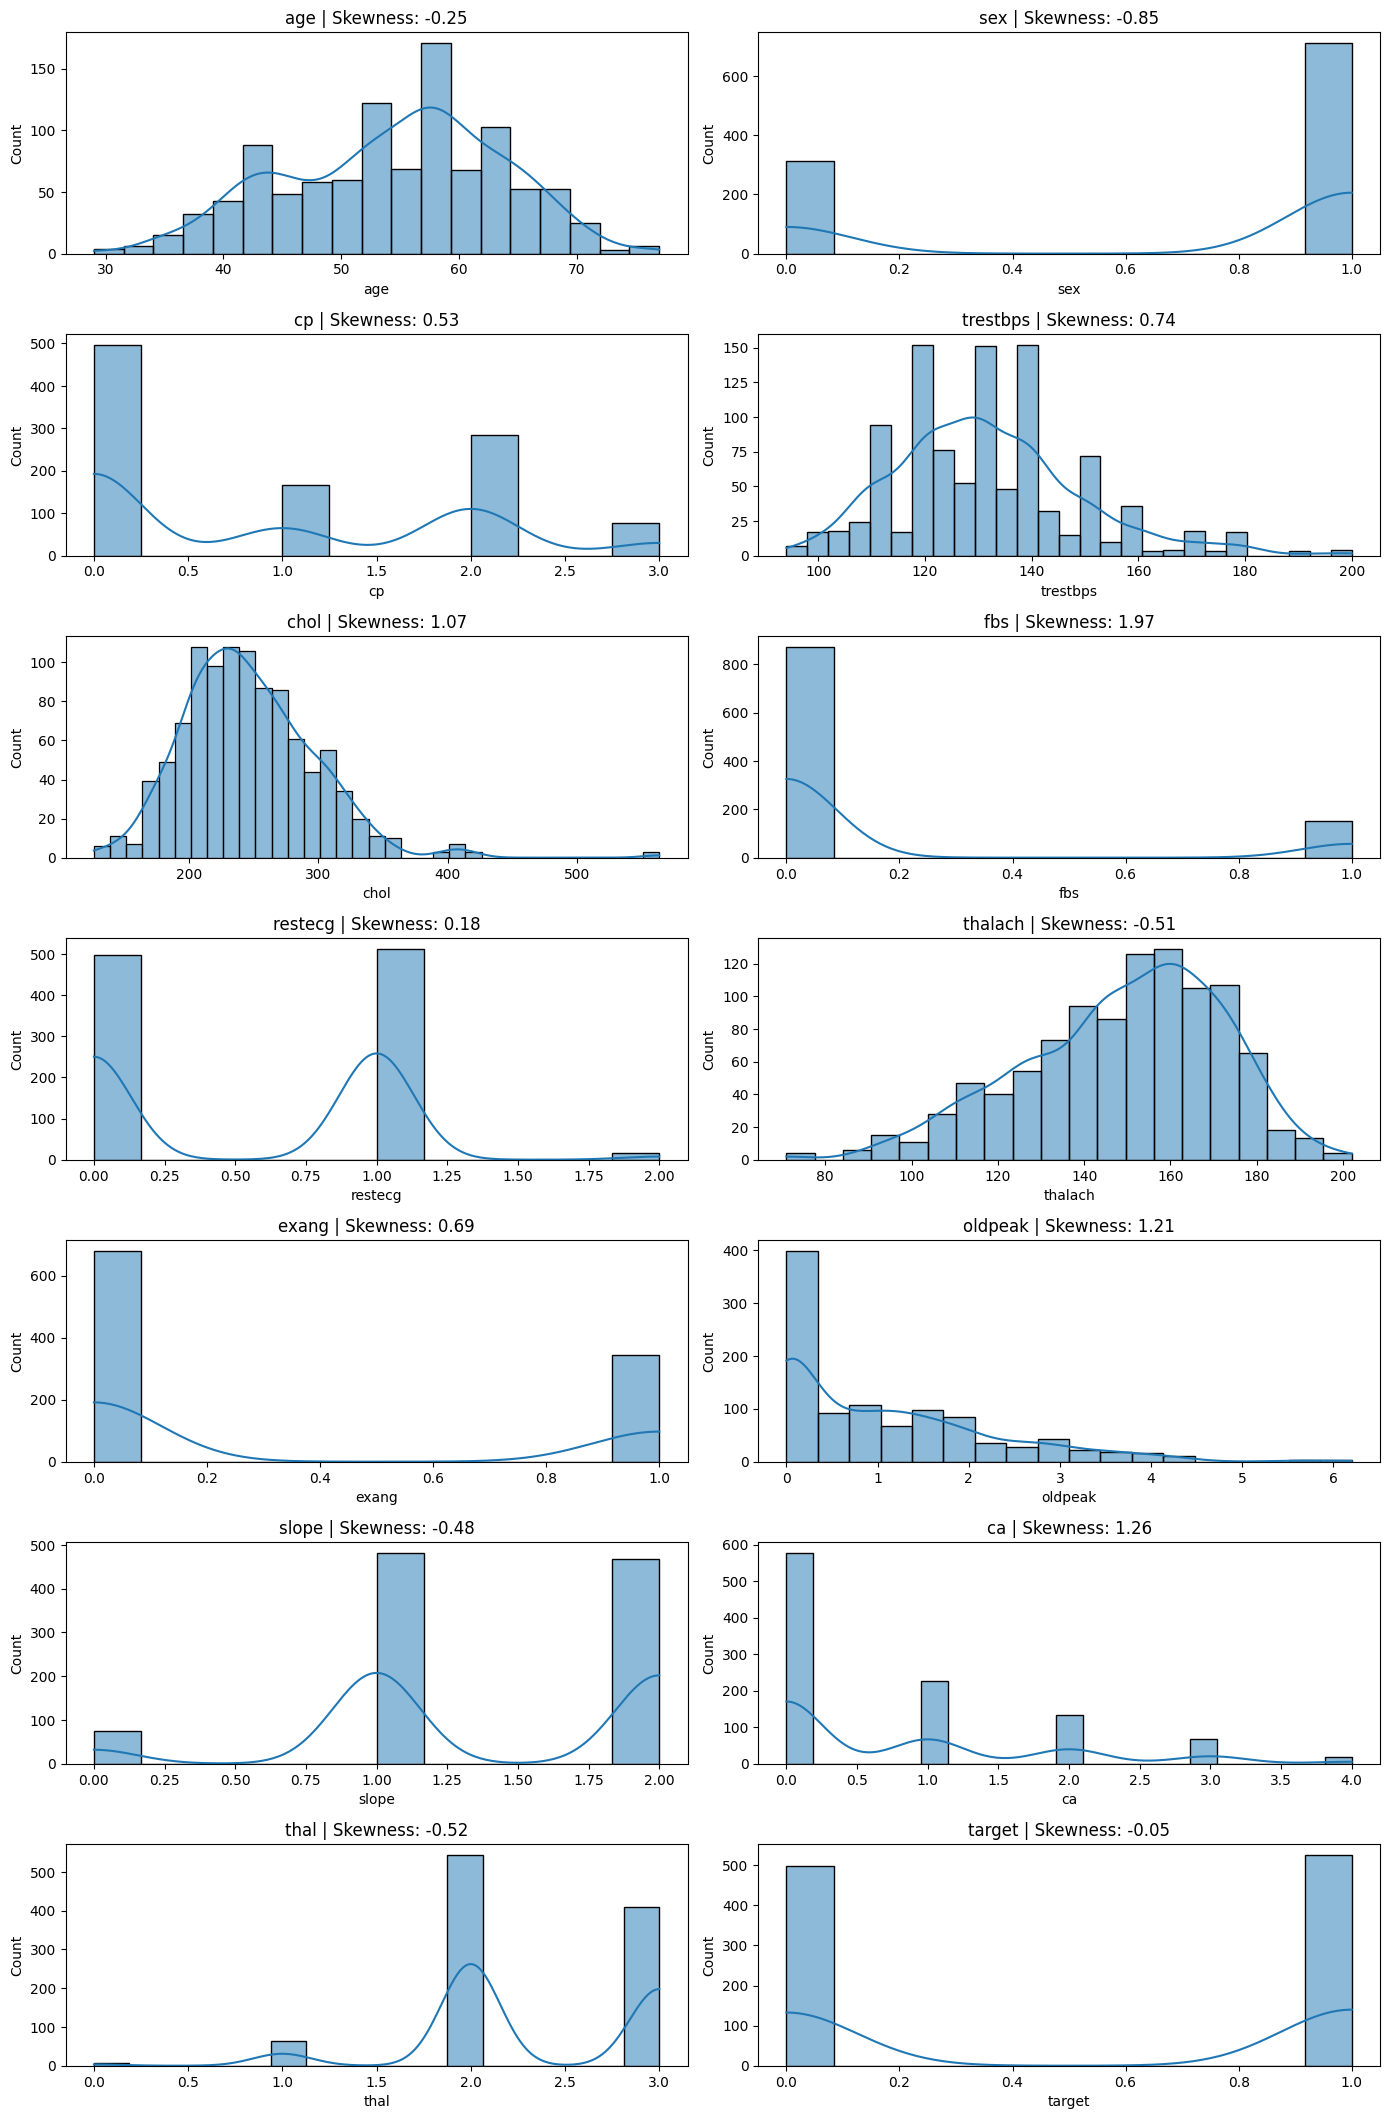

In [3]:
# TODO
print("columns are:\n")
print(df.columns.tolist())
print("=========================================================================================")
print("=========================================================================================")
print("info:\n")
print(df.info())
print("=========================================================================================")
print("=========================================================================================")
print("counts of missing values in each column are:\n")
print(df.isnull().sum())
print("=========================================================================================")
print("=========================================================================================")
print("descriptions of the data:\n")
print(df.describe())
print("=========================================================================================")
print("=========================================================================================")
numerical_columns = df.select_dtypes(include=["float64", "int64"]).columns
plt.figure(figsize=(14, len(numerical_columns) * 3))
for index, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, index)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")
    
plt.tight_layout()
plt.show()

## Analysis of Features

As you have probably noticed, in the dataset that you checked, some features are discrete and the rest are continuous. The following code specifies continuous and discrete features for you. **Note**: In the cells below, `df` is the same dataframe that you loaded in the previous section. You can change its name according to your code.

In [4]:
feature_list = [feature for feature in df.columns]
print("There are",len(feature_list),"features found in the data")

There are 14 features found in the data


In [5]:
#Print Discrete Feature Data
discrete_feature=[feature for feature in feature_list if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
print("Discrete features are ",discrete_feature)

#Print Continuous Feature Data
cont_feature=[feature for feature in feature_list if len(df[feature].unique())>25]
print("Continuous Variables Count: {}".format(len(cont_feature)))
print("Continuous features are ",cont_feature)

Discrete Variables Count: 9
Discrete features are  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
Continuous Variables Count: 5
Continuous features are  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


# Perceptron

### Stochastic Gradient Descent

We will implement the perceptron algorithm in python 3 and numpy. The perceptron will learn using the stochastic gradient descent algorithm (SGD). Gradient Descent minimizes a function by following the gradients of the cost function.

### Calculating the Error

To calculate the error of a prediction we first need to define the objective function of the perceptron.

#### Hinge Loss Function

To do this, we need to define the loss function, to calculate the prediction error. We will use hinge loss for our perceptron:

$$c(x, y, f(x)) = (1 - y * f(x))_+$$

$c$ is the loss function, $x$ the sample, $y$ is the true label, $f(x)$ the predicted label.

This means the following:
$$
c(x, y, f(x))=
\begin{cases}
    0,& \text{if } y * f(x)\geq 1\\
    1-y*f(x),              & \text{else}
\end{cases}
$$

So consider, if y and f(x) are signed values $(+1,-1)$:

<ul>
    <li>the loss is 0, if $y*f(x)$ are positive, respective both values have the same sign.</li>
    <li>loss is $1-y*f(x)$ if $y*f(x)$ is negative</li>
</ul>

#### Objective Function

As we defined the loss function, we can now define the objective function for the perceptron:

$$l_i(w) = \big(-y_i \langle x_i,w \rangle\big)_+$$

We can write this without the dot product with a sum sign:

$$l_i(w) = (-y_i \sum_{i=1}^n x_iw)_+$$

So the sample $x_i$ is misclassified, if $y_i \langle x_i,w \rangle \leq 0$. The general goal is, to find the global minima of this function, respectively find a parameter $w$, where the error is zero.

#### Derive the Objective Function

To do this we need the gradients of the objective function. The gradient of a function $f$ is the vector of its partial derivatives. The gradient can be calculated by the partially derivative of the objective function.

$$ \nabla l_i(w) = -y_i x_i $$


This means, if we have a misclassified sample $x_i$, respectively $ y_i \langle x_i,w \rangle \leq 0 $, update the weight vector
$w$ by moving it in the direction of the misclassified sample.


$$w = w + y_i x_i$$

With this update rule in mind, we can start writing our perceptron algorithm in python.

## Model


Finally we can code our SGD algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

In [6]:
def perceptron_sgd(X, Y):
    '''
    # TODO: implement the below

    Initialize the weight vector for the perceptron with zeros
    Set the learning rate
    Set the number of epochs
    Iterate n times over the whole dataset.
    Iterate over each sample in the dataset
    Misclassification condition y_i * (x_i . w) <= 0
    Update rule for the weights w = w + y_i * x_i including the learning rate

    '''
    w = np.zeros(shape=Y.shape, dtype=np.float64)
    lr = 0.05
    num_epochs = 100
    for epoch in range(num_epochs):
        for i in range(X.shape[0]):
            dot_product = np.dot(X[i], w)
            if Y[i] * dot_product <= 0:
                w = w + lr * Y[i] * X[i]



    return w

### Let the Perceptron learn!

Next we can execute our code to train a classifier model. To see the learning progress of the perceptron, we add a plotting feature to our algorithm, counting the total error in each epoch.

In [7]:
def perceptron_sgd_plot(X, Y):
    '''
    TODO: train perceptron and plot the total loss in each epoch. You may not use the above perceptron_sgd(X, Y) function.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''

    # Your Implementation here
    errors = []
    lr = 0.05
    num_epochs = 1000
    w = np.zeros(shape=X.shape[1], dtype=np.float64)
        
    for epoch in range(num_epochs):
        error = 0.0
        for i in range(X.shape[0]):
            dot_product = np.dot(X[i], w)
            if Y[i] * dot_product < 1:
                error += (1 - Y[i] * dot_product)
            if Y[i] * dot_product <= 0:
                w = w + lr * Y[i] * X[i]
                
        errors.append(error)
        

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

In [8]:
X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak']].to_numpy()
y = df.loc[:, "target"].to_numpy()
y = np.where(y == 0, -1, 1)

In [9]:
# TODO: Add a bias term -1 into the dataset. This is needed for the SGD to work.

# add a -1 bias term to the end of each row
bias_column = np.full([X.shape[0], 1], -1, dtype=np.float64)
print("before adding bias col:\n", X)
# Concatenate the original X with the bias column
X = np.concatenate([X, bias_column], axis=1)
print("after adding bias col:\n", X)

before adding bias col:
 [[  1.    0.    0.  ... 212.  168.    1. ]
 [  1.    0.    1.  ... 203.  155.    3.1]
 [  1.    0.    0.  ... 174.  125.    2.6]
 ...
 [  1.    0.    0.  ... 275.  118.    1. ]
 [  0.    0.    0.  ... 254.  159.    0. ]
 [  1.    0.    0.  ... 188.  113.    1.4]]
after adding bias col:
 [[  1.    0.    0.  ... 168.    1.   -1. ]
 [  1.    0.    1.  ... 155.    3.1  -1. ]
 [  1.    0.    0.  ... 125.    2.6  -1. ]
 ...
 [  1.    0.    0.  ... 118.    1.   -1. ]
 [  0.    0.    0.  ... 159.    0.   -1. ]
 [  1.    0.    0.  ... 113.    1.4  -1. ]]


In [10]:
# TODO: Split the data to train and test with a 0.2 ratio
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True)

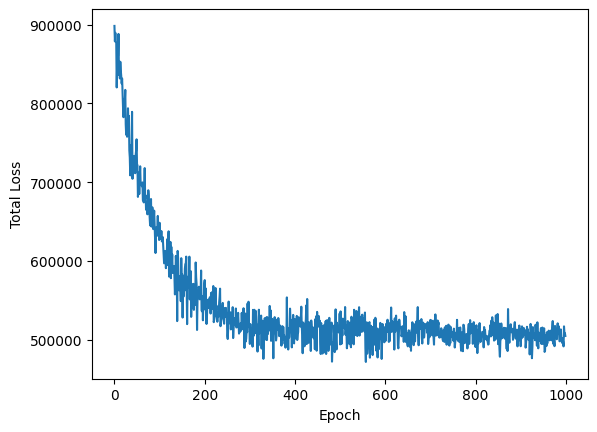

In [11]:
w = perceptron_sgd_plot(X_train, y_train)


### Accuracy


Implement the `accuracy_score` function by considering the predictions and true labels.

In [12]:
def accuracy_score(y_true, y_pred):
    #TODO: Your implementation
    correct = sum(y_pred == y_true)
    return correct / len(y_true)

Get the accuracy of your model using the function you implemented.

In [13]:
# TODO
predictions = np.sign(np.dot(X_val, w))

print("Accuracy of the perceptron is: ", accuracy_score(y_val, predictions))

Accuracy of the perceptron is:  0.8195121951219512


### Confusion Matrix

Implement the `confusion_matrix` function to generate the confusion matrix by receiving the predicted labels, the real labels and the labels themselves.

In [14]:
def confusion_matrix(actual, predicted, labels):
    # TODO: Initialize the confusion matrix
    matrix = np.zeros((len(labels), len(labels)), dtype=np.int64)

    # TODO: Populate the confusion matrix
    for actual_label, predicted_label in zip(actual, predicted):
        matrix[labels[actual_label], labels[predicted_label]] += 1
    
    return matrix

Implement the following function to plot the confusion matrix obtained from the previous part.

In [15]:
def plot_confusion_matrix(matrix, labels):
    #TODO: plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=2)
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('Actual labels')
    plt.title('Confusion Matrix')

Now plot the confusion matrix for your model:

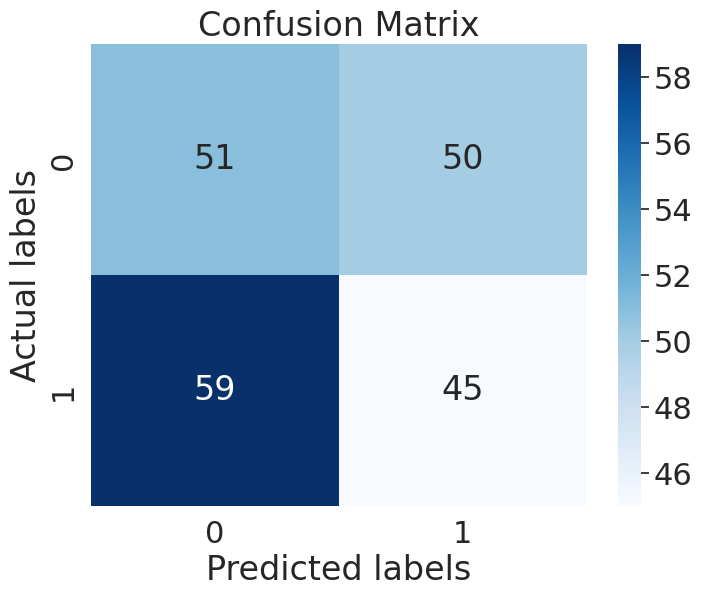

In [16]:
# # TODO
for i in range(len(predictions)):
    if predictions[i] == -1:
        predictions[i] = 0
    if y[i] == -1:
        y[i] = 0
labels = {0: 0, 1: 1}
conf_matrix = confusion_matrix(y, predictions, labels)
plot_confusion_matrix(conf_matrix, labels)

In [17]:
print(conf_matrix)

[[51 50]
 [59 45]]


### F1 Score

Implement the following functions to calculate precision, recall and [F1 score](https://en.wikipedia.org/wiki/F-score) using confusion matrix. Then calculate all three metrics for your model.

In [18]:
def recall_score(cm):
    true_positives = cm[1, 1]
    false_negatives = cm[1, 0]
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    return recall

print(recall_score(conf_matrix))

0.4326923076923077


In [19]:
def precision_score(cm):
    true_positives = cm[1, 1]
    false_positives = cm[0, 1]
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    return precision

print(precision_score(conf_matrix))

0.47368421052631576


In [20]:
def f1_score(cm):
    precision = precision_score(cm)
    recall = recall_score(cm)
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return f1

print(f1_score(conf_matrix))

0.4522613065326634


# Naive Bayes

## Model

To predict the target column we want to use a Naive Bayes classifier. In this section, you must implement the functions of the `MixedDataNB` class. Assume continuous features follow a normal distribution. **Hint**: You need to train a Naive Bayes model that implements the likelihood function for categorical and continuous values in two different ways. Search for Gaussian NB and Multinomial NB. **Note**: Please feel free to modify the following class and its functions.

In [21]:
from collections import defaultdict
from sklearn.base import BaseEstimator, ClassifierMixin
class MixedDataNB(BaseEstimator, ClassifierMixin):

    def __init__(self, category, continuous):
        self.categorical_cols = category
        self.continuous_cols = continuous
        self.class_counts = defaultdict(int)
        self.class_likelihoods = defaultdict(dict)
        self.class_priors = defaultdict(float)

        
    def set_category(self, category):
        self.categorical_cols = category
        
    def set_continuous(self, continuous):
        self.continuous_cols = continuous

    def fit(self, X, y):
        '''
        TODO: Train moodel using train data

        :param X: data samples as a numpy array
        :param Y: data labels as a numpy array
        '''
        num_samples, num_features = X.shape
        self.classes = np.unique(y)
        
        for c in self.classes:
            self.class_counts[c] = np.sum(y == c)
            self.class_priors[c] = self.class_counts[c] / num_samples
        
        for col in self.categorical_cols:
            for c in self.classes:
                feature_values = np.unique(X[y == c, col])
                self.class_likelihoods[c][col] = defaultdict(float)
                for val in feature_values:
                    self.class_likelihoods[c][col][val] = np.sum(X[y == c, col] == val) / self.class_counts[c]
        
        
        for col in self.continuous_cols:
            for c in self.classes:
                self.class_likelihoods[c][col] = {}
                mean = np.mean(X[y == c, col])
                std = np.std(X[y == c, col])
                self.class_likelihoods[c][col] = (mean, std)
                
    def predict(self, X):
        '''
        TODO: Predict test data labels

        :param X: data samples as a numpy array
        :return: labels vector as a numpy array
        '''
        result = []
        for x in X:
            max_prob = -np.inf
            best_class = None
            for cls in self.classes:
                class_prob = np.log(self.class_priors[cls])
                for col, val in enumerate(x):
                    if col in self.categorical_cols:
                        likelihood = self.class_likelihoods[cls][col].get(val, 0)
                        if likelihood == 0:
                            class_prob = -np.inf
                            break
                        class_prob += np.log(likelihood)

                    elif col in self.continuous_cols:
                        mean, std = self.class_likelihoods[cls][col]
                        if std == 0:
                            likelihood = 0 if val != mean else 1
                        else:
                            likelihood = np.exp(-(val-mean)**2 / (2 * std**2)) / (np.sqrt(2*np.pi) * std)
                        if likelihood == 0:
                            class_prob = -np.inf
                            break
                        class_prob += np.log(likelihood)

                if class_prob > max_prob:
                    max_prob = class_prob
                    best_class = cls
            result.append(best_class)
                    
        return np.array(result)

## Train and Validation


### Data splitting

Split the training and validation data. Separate 20% of the data for validation.

In [22]:
# TODO
X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak']].to_numpy()
y = df.loc[:, "target"].to_numpy()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True)

### Model training

In [23]:
# TODO

discrete_feature=[feature for feature in feature_list if len(df[feature].unique())<25]
cont_feature=[feature for feature in feature_list if len(df[feature].unique())>25]
mixedDataNB = MixedDataNB(discrete_feature, cont_feature)

mixedDataNB.set_category([i for i in range(0, 9)])
mixedDataNB.set_continuous([i for i in range(9, 13)])

mixedDataNB.fit(X_train, y_train)

### Make predictions

In [24]:
# TODO
predictions = mixedDataNB.predict(X_val)
print(predictions)

[0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 0 1
 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0
 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0
 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1
 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1]


### Accuracy

Get the accuracy of your model using the function you implemented.

In [25]:
print(accuracy_score(y_val, predictions))

0.8390243902439024


### Confusion Matrix

Now, using the functions you wrote, plot the confusion matrix for the model you trained.

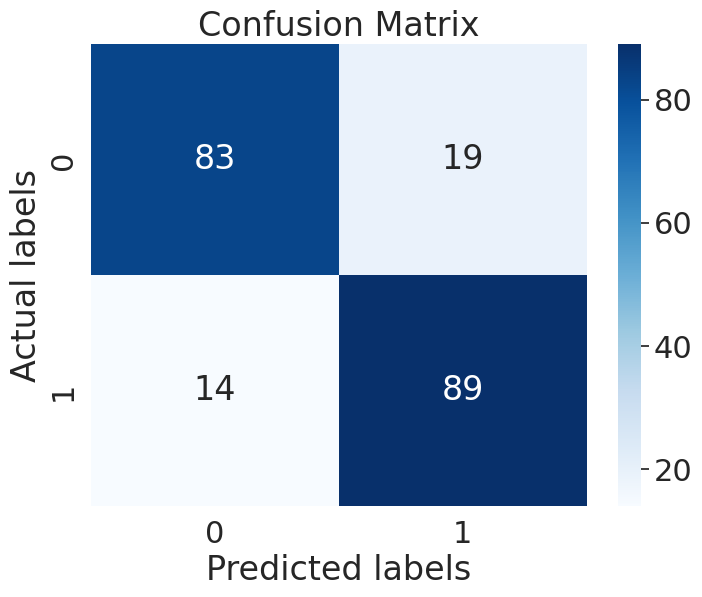

In [27]:
# TODO
conf_matrix = confusion_matrix(y_val, predictions, labels)
labels = {0:0, 1:1}
plot_confusion_matrix(conf_matrix, labels)

### F1 Score

Using your implemented functions in the previous section, calculate precision, recall and F1 score using confusion matrix. Then calculate all three metrics for your model.

In [28]:
print(recall_score(conf_matrix))

0.8640776699029126


In [29]:
print(precision_score(conf_matrix))

0.8240740740740741


In [30]:
print(f1_score(conf_matrix))

0.8436018957345971


### Heatmap

By ploting the heatmap obtained for chol and oldpeak features from your model, compare the usefulness of these two features.


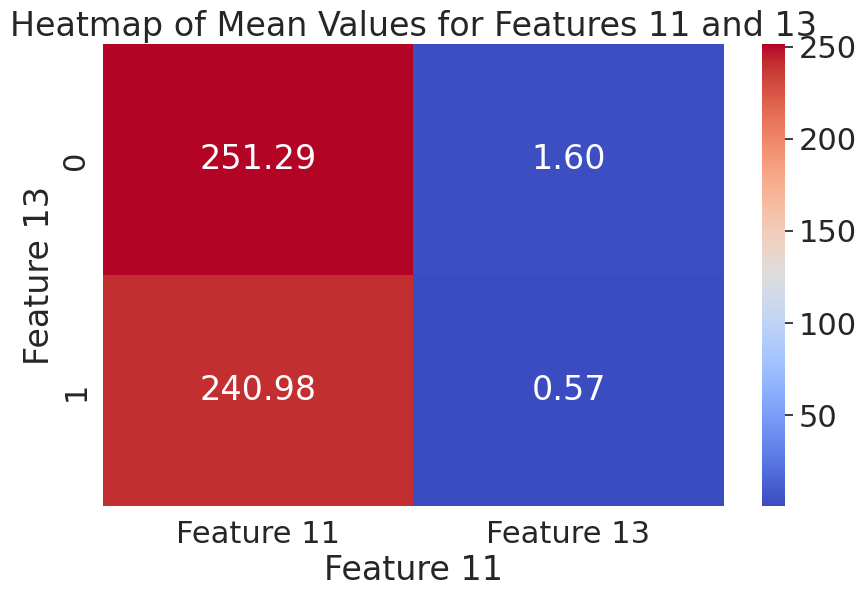

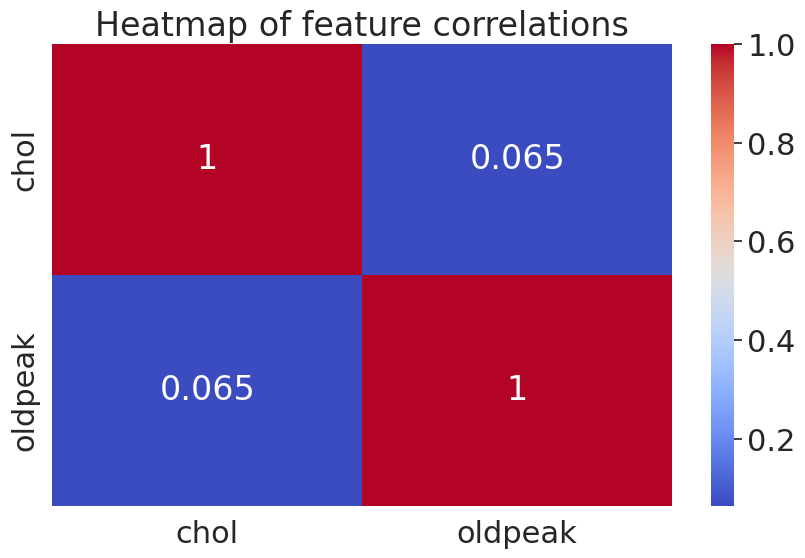

In [38]:
# TODO
feature1 = 10
feature2 = 12


df = pd.DataFrame(X, columns=[f"Feature {i+1}" for i in range(X.shape[1])])
df["Label"] = y

subset = df[[f"Feature {feature1+1}", f"Feature {feature2+1}", "Label"]]
means = subset.groupby("Label").mean().reset_index()

plt.figure(figsize=(10, 6))
sns.heatmap(means[[f"Feature {feature1+1}", f"Feature {feature2+1}"]], annot=True, fmt=".2f", cmap="coolwarm")
plt.title(f"Heatmap of Mean Values for Features {feature1+1} and {feature2+1}")
plt.xlabel(f"Feature {feature1+1}")
plt.ylabel(f"Feature {feature2+1}")
plt.show()

df = pd.read_csv("/kaggle/input/heart-dataset/heart.csv")
plt.figure(figsize=(10, 6))
sns.heatmap(df[['chol', 'oldpeak']].corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap of feature correlations")
plt.show()

Train your model once by removing the chol feature and once by removing the oldpeak feature and calculate its accuracy. Compare the obtained results with the previous part.

Remove Chol and test model

In [41]:
# TODO
discrete_feature=[feature for feature in feature_list if len(df[feature].unique())<25]
cont_feature=[feature for feature in feature_list if len(df[feature].unique())>25]
mixedDataNB = MixedDataNB(discrete_feature, cont_feature)

mixedDataNB.set_category([i for i in range(0, 9)])
mixedDataNB.set_continuous([9, 10, 11])

removed_chol = np.delete(X_train, 11, 1)
mixedDataNB.fit(removed_chol, y_train)

removed_chol = np.delete(X_val, 11, 1)
predictions = mixedDataNB.predict(removed_chol)
print(accuracy_score(y_val, predictions))

0.8536585365853658


Remove oldpeak and test model

In [42]:
# TODO
discrete_feature=[feature for feature in feature_list if len(df[feature].unique())<25]
cont_feature=[feature for feature in feature_list if len(df[feature].unique())>25]
mixedDataNB = MixedDataNB(discrete_feature, cont_feature)

mixedDataNB.set_category([i for i in range(0, 9)])
mixedDataNB.set_continuous([9, 10, 11])

removed_chol = np.delete(X_train, 12, 1)
mixedDataNB.fit(removed_chol, y_train)

removed_chol = np.delete(X_val, 12, 1)
predictions = mixedDataNB.predict(removed_chol)
print(accuracy_score(y_val, predictions))

0.8390243902439024


Comparison

**Answer:**

***The low correlation (0.065) between the two features suggests that their contributions to the model's accuracy are relatively independent of each other. The slight difference in accuracy upon their removal indicates that they provide somewhat unique information to the model, but their impact is not dramatically different.***

# Comparison

Which model did better: the perceptron or the Naive Bayes model? What factors do you think influenced the difference in their performance?

### Answer:

***As metrics depict, Naive Bayes is working much better because it is not only depending on the data and it has a prior prob that comes from a prior knowledge which makes it a better method in practice.***

# Imbalanced Data

By using the model you designed and the functions you implemented, train your model on the three imbalanced data sets provided to you and calculate accuracy, recall, precision, and F1 score metrics for it each time. The confusion matrix should also be plotted each time. Finally, analyze based on the obtained results which accuracy and F1 score metrics are most appropriate for evaluating the model in imbalanced datasets. **Note:** In order to prevent code duplication, you are free to define functions and only use them with different datasets.

## First dataset

### Load data

In [43]:
df = pd.read_csv("/kaggle/input/imbalanced-data/1.csv")

### Find the distribution


Find the number of samples from each target label.

In [54]:
# TODO
X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak']].to_numpy()
y = df.loc[:, "target"].to_numpy()
zero_label = (y == 0).sum()
one_label = (y == 1).sum()
print("number of zero labels: ", zero_label)
print("number of one labels: ", one_label)


bias_column = np.full([X.shape[0], 1], -1, dtype=np.float64)
X = np.concatenate([X, bias_column], axis=1)

number of zero labels:  499
number of one labels:  226


### Split data

In [55]:
# TODO
for i in range(len(y)):
    if y[i] == 0:
        y[i] = -1
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True)

In [56]:
print(X_val.shape)

(145, 14)


### Train model and make predictions

[0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1
 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0
 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1
 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0]


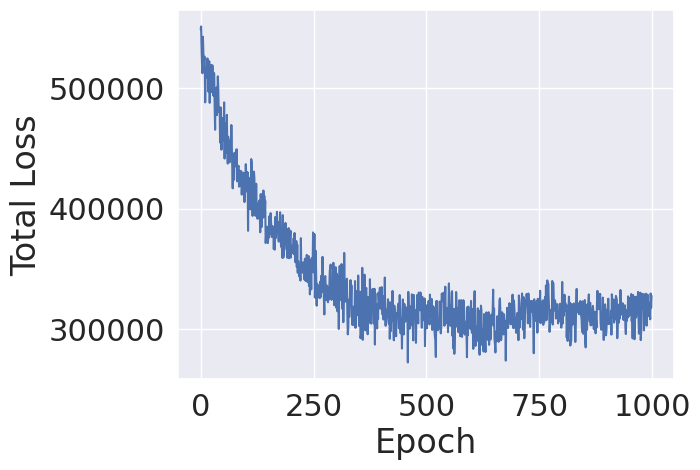

In [57]:
# TODO

w = perceptron_sgd_plot(X_train, y_train)
perceptron_predictions = np.sign(np.dot(X_val, w))

X_train = np.delete(X_train, 13, 1)
X_val = np.delete(X_val, 13, 1)
for i in range(len(y_train)):
    if y_train[i] == -1:
        y_train[i] = 0
for i in range(len(y_val)):
    if y_val[i] == -1:
        y_val[i] = 0
        
discrete_feature=[feature for feature in feature_list if len(df[feature].unique())<25]
cont_feature=[feature for feature in feature_list if len(df[feature].unique())>25]
mixedDataNB = MixedDataNB(discrete_feature, cont_feature)

mixedDataNB.set_category([i for i in range(0, 9)])
mixedDataNB.set_continuous([i for i in range(9, 13)])

mixedDataNB.fit(X_train, y_train)
bayes_predictions = mixedDataNB.predict(X_val)
print(bayes_predictions)

### Plot confusion matrix

perceptron classifier:
Naive Bayes classifier:


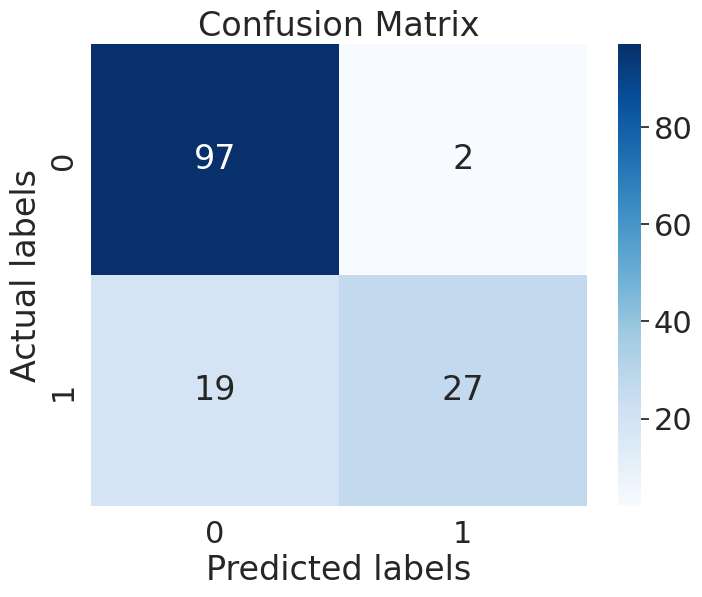

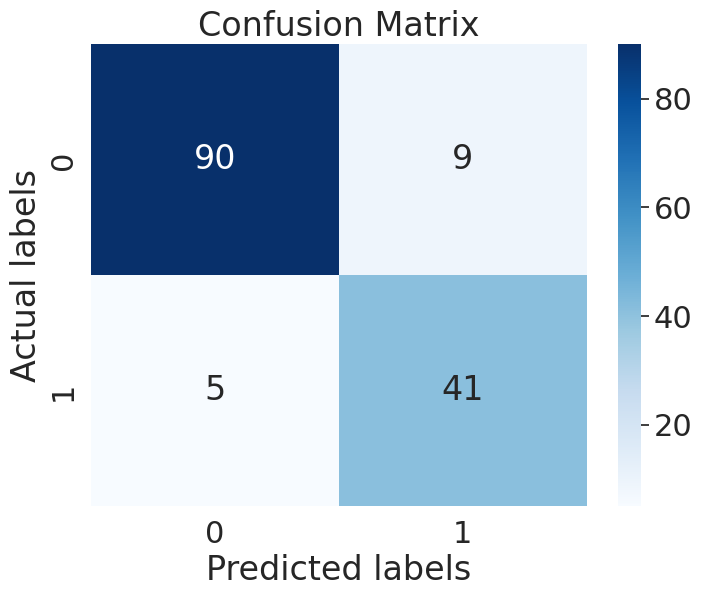

In [58]:
# TODO
print("perceptron classifier:")
for i in range(len(perceptron_predictions)):
    if perceptron_predictions[i] == -1:
        perceptron_predictions[i] = 0
        
labels = {0: 0, 1: 1}
conf_matrix = confusion_matrix(y_val, perceptron_predictions, labels)
plot_confusion_matrix(conf_matrix, labels)


print("Naive Bayes classifier:")
conf_matrix = confusion_matrix(y_val, bayes_predictions, labels)
plot_confusion_matrix(conf_matrix, labels)

### Calculate metrics

In [60]:
# TODO
conf_matrix = confusion_matrix(y_val, perceptron_predictions, labels)
print("Perceptron metrics:")
print("accuracy", accuracy_score(y_val, perceptron_predictions))
print("recall", recall_score(conf_matrix))
print("precision", precision_score(conf_matrix))

conf_matrix = confusion_matrix(y_val, bayes_predictions, labels)
print("\nMixed naive bayes metrics:")
print("accuracy:", accuracy_score(y_val, bayes_predictions))
print("recall", recall_score(conf_matrix))
print("precision", precision_score(conf_matrix))

Perceptron metrics:
accuracy 0.8551724137931035
recall 0.5869565217391305
precision 0.9310344827586207

Mixed naive bayes metrics:
accuracy: 0.903448275862069
recall 0.8913043478260869
precision 0.82


## Second dataset

### Load data

In [61]:
df = pd.read_csv("/kaggle/input/imbalanced-data/2.csv")

### Find the distribution


Find the number of samples from each target label.

In [63]:
# TODO
X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak']].to_numpy()
y = df.loc[:, "target"].to_numpy()
zero_label = (y == 0).sum()
one_label = (y == 1).sum()
print("number of zero labels: ", zero_label)
print("number of one labels: ", one_label)


bias_column = np.full([X.shape[0], 1], -1, dtype=np.float64)
X = np.concatenate([X, bias_column], axis=1)

number of zero labels:  499
number of one labels:  126


### Split data

In [64]:
# TODO
for i in range(len(y)):
    if y[i] == 0:
        y[i] = -1
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True)

In [65]:
print(X_val.shape)

(125, 14)


### Train model and make predictions

[0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 0 0 0 1 1 1 1 0 0 0 0 0 0]


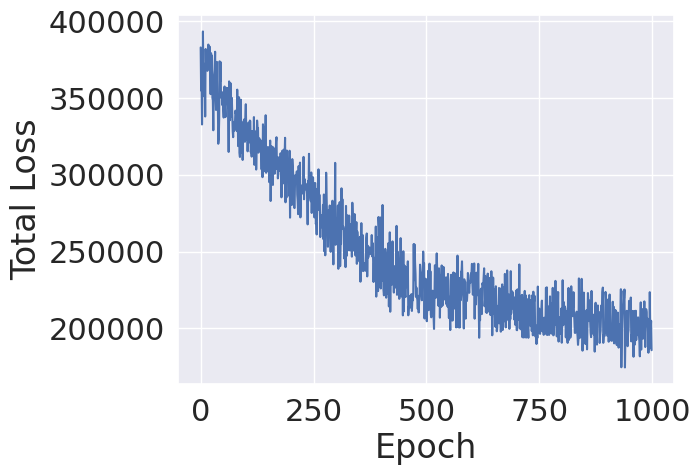

In [66]:
# TODO
w = perceptron_sgd_plot(X_train, y_train)
perceptron_predictions = np.sign(np.dot(X_val, w))

X_train = np.delete(X_train, 13, 1)
X_val = np.delete(X_val, 13, 1)
for i in range(len(y_train)):
    if y_train[i] == -1:
        y_train[i] = 0
for i in range(len(y_val)):
    if y_val[i] == -1:
        y_val[i] = 0
        
discrete_feature=[feature for feature in feature_list if len(df[feature].unique())<25]
cont_feature=[feature for feature in feature_list if len(df[feature].unique())>25]
mixedDataNB = MixedDataNB(discrete_feature, cont_feature)

mixedDataNB.set_category([i for i in range(0, 9)])
mixedDataNB.set_continuous([i for i in range(9, 13)])

mixedDataNB.fit(X_train, y_train)
bayes_predictions = mixedDataNB.predict(X_val)
print(bayes_predictions)

### Plot confusion matrix

perceptron classifier:
Naive Bayes classifier:


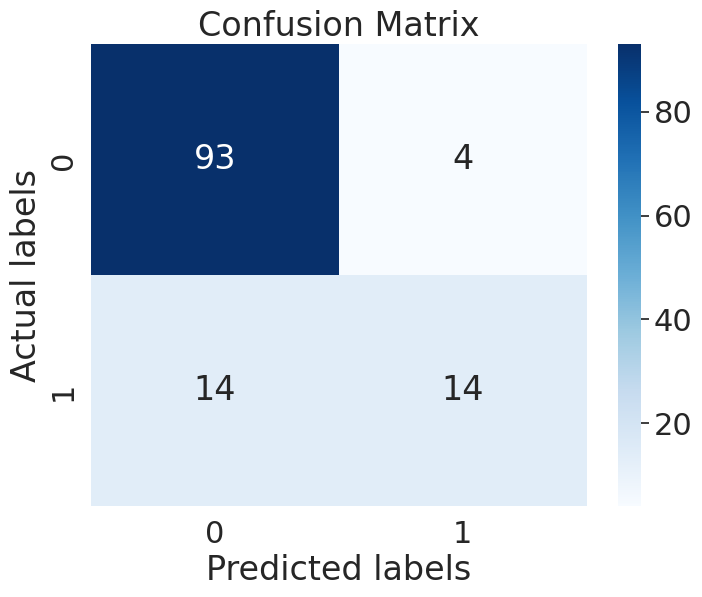

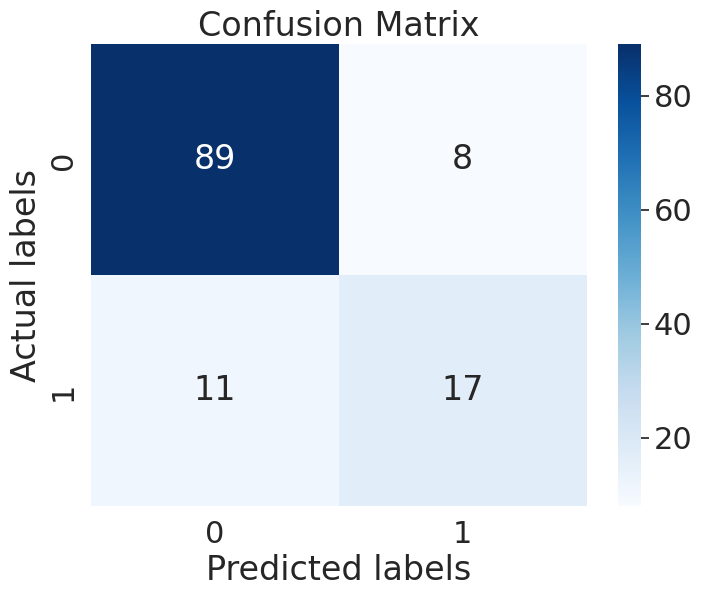

In [67]:
# TODO
print("perceptron classifier:")
for i in range(len(perceptron_predictions)):
    if perceptron_predictions[i] == -1:
        perceptron_predictions[i] = 0
        
labels = {0: 0, 1: 1}
conf_matrix = confusion_matrix(y_val, perceptron_predictions, labels)
plot_confusion_matrix(conf_matrix, labels)


print("Naive Bayes classifier:")
conf_matrix = confusion_matrix(y_val, bayes_predictions, labels)
plot_confusion_matrix(conf_matrix, labels)

### Calculate metrics

In [68]:
# TODO
conf_matrix = confusion_matrix(y_val, perceptron_predictions, labels)
print("Perceptron metrics:")
print("accuracy:", accuracy_score(y_val, perceptron_predictions))
print("recall", recall_score(conf_matrix))
print("precision", precision_score(conf_matrix))

conf_matrix = confusion_matrix(y_val, bayes_predictions, labels)
print("\nMixed naive bayes metrics:")
print("accuracy", accuracy_score(y_val, bayes_predictions))
print("recall", recall_score(conf_matrix))
print("precision", precision_score(conf_matrix))

Perceptron metrics:
accuracy: 0.856
recall 0.5
precision 0.7777777777777778

Mixed naive bayes metrics:
accuracy 0.848
recall 0.6071428571428571
precision 0.68


## Third dataset

### Load data

In [69]:
df = pd.read_csv("/kaggle/input/imbalanced-data/3.csv")

### Find the distribution


Find the number of samples from each target label.

In [71]:
# TODO
X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak']].to_numpy()
y = df.loc[:, "target"].to_numpy()
zero_label = (y == 0).sum()
one_label = (y == 1).sum()
print("number of zero labels: ", zero_label)
print("number of one labels: ", one_label)


bias_column = np.full([X.shape[0], 1], -1, dtype=np.float64)
X = np.concatenate([X, bias_column], axis=1)

number of zero labels:  499
number of one labels:  26


### Split data

In [72]:
# TODO
for i in range(len(y)):
    if y[i] == 0:
        y[i] = -1
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True)

### Train model and make predictions

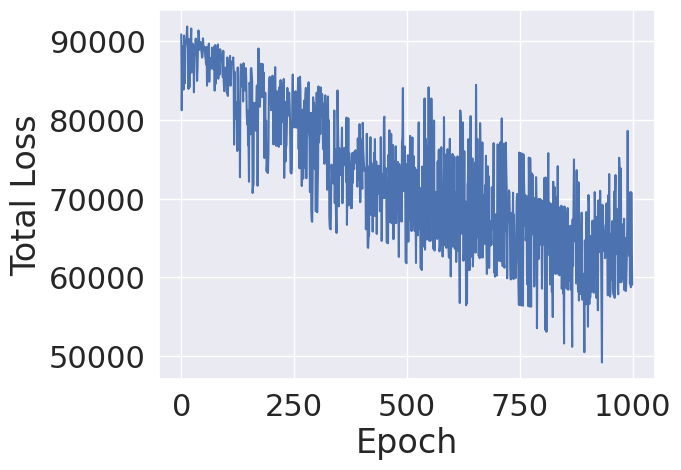

In [73]:
# TODO
w = perceptron_sgd_plot(X_train, y_train)
perceptron_predictions = np.sign(np.dot(X_val, w))

X_train = np.delete(X_train, 13, 1)
X_val = np.delete(X_val, 13, 1)
for i in range(len(y_train)):
    if y_train[i] == -1:
        y_train[i] = 0
for i in range(len(y_val)):
    if y_val[i] == -1:
        y_val[i] = 0
        
discrete_feature=[feature for feature in feature_list if len(df[feature].unique())<25]
cont_feature=[feature for feature in feature_list if len(df[feature].unique())>25]
mixedDataNB = MixedDataNB(discrete_feature, cont_feature)

mixedDataNB.set_category([i for i in range(0, 9)])
mixedDataNB.set_continuous([i for i in range(9, 13)])

mixedDataNB.fit(X_train, y_train)
bayes_predictions = mixedDataNB.predict(X_val)

### Plot confusion matrix

perceptron classifier:
Naive Bayes classifier:


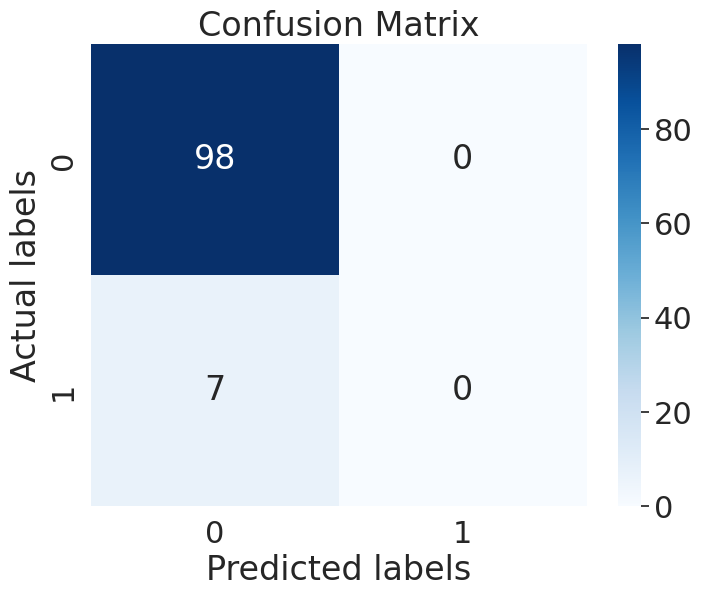

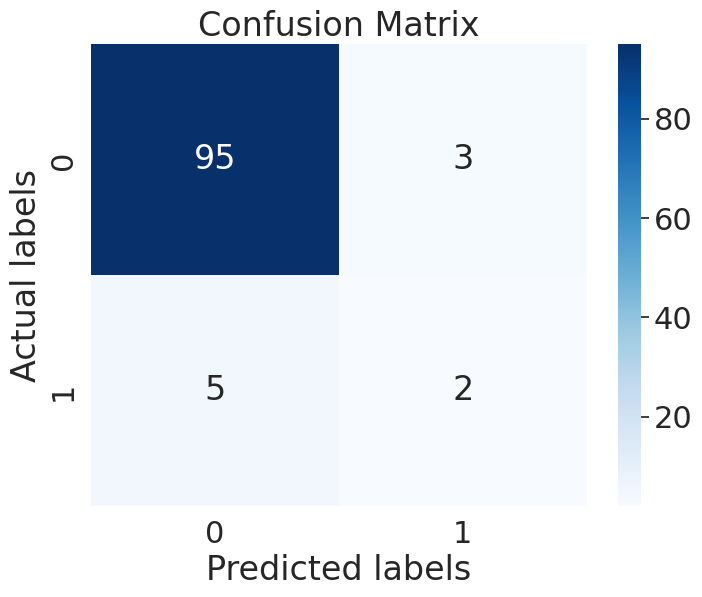

In [74]:
# TODO
print("perceptron classifier:")
for i in range(len(perceptron_predictions)):
    if perceptron_predictions[i] == -1:
        perceptron_predictions[i] = 0
        
labels = {0: 0, 1: 1}
conf_matrix = confusion_matrix(y_val, perceptron_predictions, labels)
plot_confusion_matrix(conf_matrix, labels)


print("Naive Bayes classifier:")
conf_matrix = confusion_matrix(y_val, bayes_predictions, labels)
plot_confusion_matrix(conf_matrix, labels)

### Calculate metrics

In [76]:
# TODO
conf_matrix = confusion_matrix(y_val, perceptron_predictions, labels)
print("Perceptron metrics:")
print("accuracy:", accuracy_score(y_val, perceptron_predictions))
print("recall:", recall_score(conf_matrix))
print("precision", precision_score(conf_matrix))

conf_matrix = confusion_matrix(y_val, bayes_predictions, labels)
print("\nMixed naive bayes metrics:")
print("accuracy:", accuracy_score(y_val, bayes_predictions))
print("recall:", recall_score(conf_matrix))
print("precision:", precision_score(conf_matrix))

Perceptron metrics:
accuracy: 0.9333333333333333
recall: 0.0
precision 0

Mixed naive bayes metrics:
accuracy: 0.9238095238095239
recall: 0.2857142857142857
precision: 0.4


## Comparison

Based on the obtained results which accuracy and F1 score metrics are most appropriate for evaluating the model in imbalanced datasets?

Answer: Naive bayes is a better approach because of several facts:
1) It uses a probabilistic decision boundary instead of a linear decision boundary which is used by Perceptron.
2) Naive Bayes is an unsupervised learning algorithm which calculate the result based on the training data. By contrast, Perceptron uses the error of the previous predictions and is a supervised algorithm.
3) Naive Bayes doesn't have iteration therefore, it is far faster than perceptron.

Note: Perceptron seems to be better option in non-linear decision boundaries.